In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
image_path = "../output_videos/player_2_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

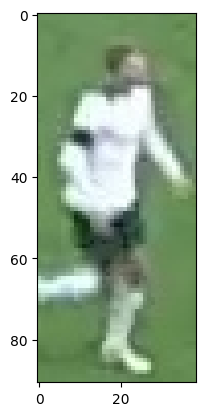

In [4]:
plt.imshow(image)
plt.show()

Take the top half of the image - (t-shirt part)

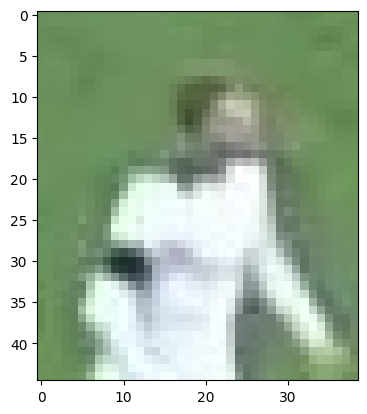

In [5]:
top_half_image = image[0: int(image.shape[0] / 2), :]
plt.imshow(top_half_image)
plt.show()

Cluster the img into two clusters - player's shirt & background

/Users/flychuban/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


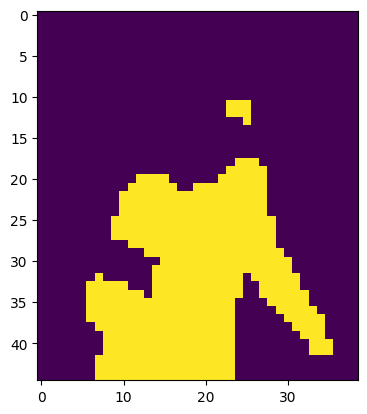

In [13]:
# Reshape image to 2D array of pixels and 3 color values (RGB)
image_2d = top_half_image.reshape(-1, 3)

kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

# Get cluster labels
labels = kmeans.labels_

# Reshape labels to original image shape - img
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display clustered image
plt.imshow(clustered_image)
plt.show()

We don't know whether the shirt value is 0 or 1. Image corners are very useful to understand this:

In [14]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print("Non player cluster: ", non_player_cluster)

Non player cluster:  0


In [17]:
player_cluster = 1 - non_player_cluster
print("Player cluster: ", player_cluster)

Player cluster:  1


In [18]:
kmeans.cluster_centers_[player_cluster]

array([222.4699793 , 234.62111801, 233.57763975])